In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

import string
string.punctuation

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
data = pd.read_csv('/content/data.csv')

In [82]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


0 label = Positive Tweet

1 label = Negative Tweet

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [84]:
data.shape

(31962, 3)

In [85]:
data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [86]:
data = data.drop('id', axis = 1)

In [87]:
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Exploring the dataset

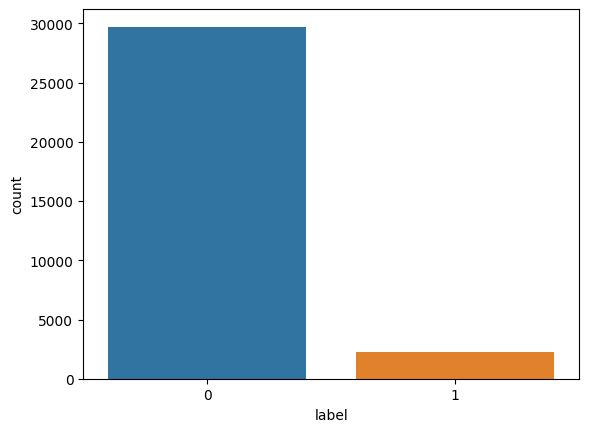

In [88]:
sns.countplot(x = data['label'])
plt.show()

In [89]:
len(data)

31962

In [90]:
# lenght of each tweet
length = list()
for i in range(len(data)):
    length.append(len(data.iloc[i,1]))

In [91]:
data['length'] = length

In [92]:
data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [93]:
data.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


Shortest Tweet -

In [94]:
data[data['length'] == min(data['length'])]['tweet'].iloc[0]

'i love you '

Longest Tweet -

In [95]:
data[data['length'] == max(data['length'])]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

Average Length Tweet -

In [96]:
data[data['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [97]:
positive = data[data['label'] == 0]

In [98]:
positive.describe()

,label,length
count,29720.0,29720.000000
mean,0.0,84.328634
std,0.0,29.566484
min,0.0,11.000000
25%,0.0,62.000000
50%,0.0,88.000000
75%,0.0,107.000000
max,0.0,274.000000


In [99]:
negative = data[data['label'] == 1]

In [100]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [101]:
negative.describe()

,label,length
count,2242.0,2242.000000
mean,1.0,90.187779
std,0.0,27.375502
min,1.0,12.000000
25%,1.0,69.000000
50%,1.0,96.000000
75%,1.0,111.000000
max,1.0,152.000000


In [102]:
from wordcloud import WordCloud

In [103]:
sentences = data['tweet'].tolist()

In [104]:
combined_sentences = " ".join(sentences)

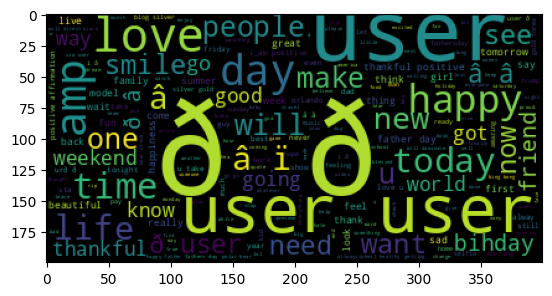

In [105]:
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

In [106]:
negative_sentences = negative['tweet'].tolist()

In [107]:
combined_negative_sentences = " ".join(negative_sentences)

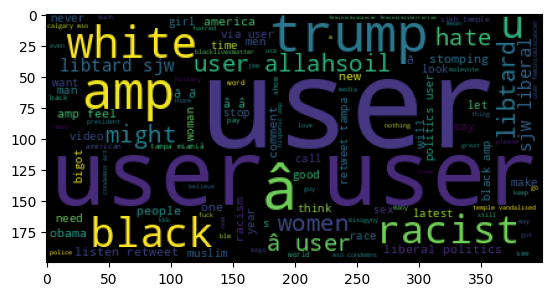

In [108]:
plt.imshow(WordCloud().generate(combined_negative_sentences))
plt.show()

Creating a pipeline which removes punctuation, stopwords and peforms tokenization

In [109]:
st = stopwords.words('english')
st.append("and")

In [110]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)
    return test_punc_st_removed

In [111]:
message_cleaning("Goblin and Ninja fOR thE win!!")

'Goblin Ninja win'

In [112]:
data_clean = data['tweet'].apply(message_cleaning)

In [113]:
data['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [114]:
data_clean[5]

'22 huge fan fare big talking leave chaos pay disputes get allshowandnogo'

In [115]:
l_data = data_clean.tolist()

In [116]:
tweets_tfidfvectorizer = TfidfVectorizer(max_features=5000, stop_words='english').fit_transform(l_data).toarray()

In [117]:
tweets_tfidfvectorizer.shape

(31962, 5000)

In [118]:
X = tweets_tfidfvectorizer
y = data['label']

Using Naive Bayes to classify

In [119]:
X.shape

(31962, 5000)

In [120]:
y.shape

(31962,)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [123]:
from sklearn.naive_bayes import MultinomialNB #for discrete values

In [124]:
NB_classifier = MultinomialNB()

In [125]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [126]:
y_pred = NB_classifier.predict(X_test)

In [127]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [128]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[8889,   16],
       [ 463,  221]])

<Axes: >

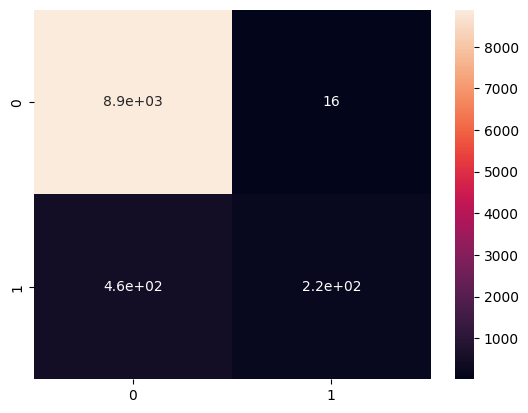

In [129]:
sns.heatmap(cm, annot = True)

In [130]:
ac = accuracy_score(y_test, y_pred)
ac

0.9500469287725519

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8905
           1       0.93      0.32      0.48       684

    accuracy                           0.95      9589
   macro avg       0.94      0.66      0.73      9589
weighted avg       0.95      0.95      0.94      9589

